# ISL - Python
## Chapter 3 - Linear Regression

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Question 8

In [147]:
#Reading the data set, and quick display of contents
auto = pd.read_csv('https://raw.githubusercontent.com/yashre-bh/ISL-Python-Chapter3/main/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [148]:
auto = auto.replace(['?'], np.nan)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [149]:
auto.dropna(inplace=True)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [150]:
X = auto['horsepower'].values
y = auto['mpg'].values
print(X.dtype)
print(y.dtype)

object
float64


In [151]:
X=X.astype(np.float)
print(X.dtype)

float64


In [152]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [153]:
reg=LinearRegression()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [155]:
reg.fit(X_train, y_train)

LinearRegression()

In [156]:
#predictions on test set
y_cap_test = reg.predict(X_test)

In [157]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [158]:
#R2 value of the test set
R2_value = r2_score(y_test, y_cap_test)
print("R2 Score =", R2_value)

R2 Score = 0.5861976451083113


In [159]:
#RMSE
print("RMSE = ", (mean_squared_error(y_test, y_cap_test)**0.5))

RMSE =  5.021512507830253


In [160]:
##Prediction for horsepower = 98
print("The corresponding response for HP = 98 is: ", reg.predict(np.array([[98]])))

The corresponding response for HP = 98 is:  [[24.4251661]]


In [161]:
#for concluding correlation
auto['horsepower']=auto['horsepower'].astype(float)
auto_new = pd.DataFrame(auto, columns = ['horsepower', 'mpg'])
auto_new.head()


,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


In [162]:
auto_new.corr()

,horsepower,mpg
horsepower,1.000000,-0.778427
mpg,-0.778427,1.000000


### a)
i. As seen from the correlation matrix, yes there is a relation between the predictor and response

ii. The relationship between predictor and response is moderately-strong, with the correlation coefficient = -0.778427

iii. The relation ship is negative

iv. Predicted value for HP=98 is mpg = 24.28360277

### b)


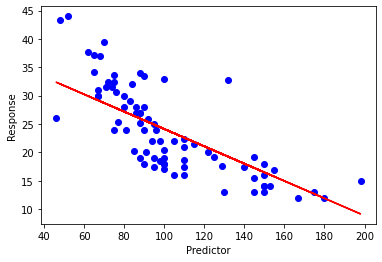

In [164]:

#Least square regression line
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_cap_test, color='red')
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.show()

### c)


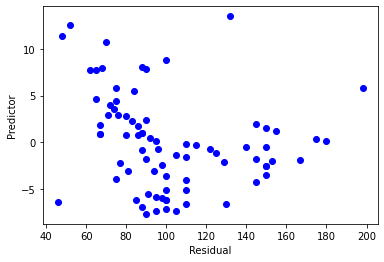

In [165]:
#Residual plot
plt.scatter(X_test, (y_test-y_cap_test),  color='blue')
plt.xlabel("Residual")
plt.ylabel("Predictor")
plt.show()

The residual plot is funnel shaped, which indicates heteroscedasticity.